In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import re

## Population preprocessing

In [171]:
file = "../data/population_suisse_clean.xlsx"

df_pop = pd.read_excel(file)
df_pop = df_pop.reset_index()

Remove district information

In [172]:
df_pop.drop(df_pop['index'].str.startswith(">>"), inplace=True)

Remove NPZ information and parenthesis information

In [173]:
clean_name = lambda s: s.partition(' ')[2]
remove_sup = lambda s: re.sub(r'\(*\ [^)]*\)', '', s)

df_pop['index'] = df_pop['index'].apply(clean_name)
df_pop['index'] = df_pop['index'].apply(remove_sup)

In [174]:
name2pop = {}
def create_dict(row):
    name2pop.update({row['index']: row["Etat de la population"]})

In [184]:
a = df_pop.apply(create_dict, axis=1)

--------

## Capacity preprocessing

In [178]:
file = '../data/2017-01-30_out.csv'
df_train = pd.read_csv(file)

/Users/onanypoint/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Clean stop id for aggregation

In [179]:
clean_id = lambda s : s.partition(':')[0]

df_train['stop_id'] = df_train['stop_id'].apply(clean_id)

Aggregate

In [180]:
most_present = lambda x: x.value_counts().index[0]

In [181]:
df = df_train.groupby(['stop_id']).agg({'name': most_present,'id': 'count'})

In [185]:
def get_pop(x):
    if x in name2pop:
        return name2pop[x]

In [192]:
df['pop'] = df.name.apply(get_pop)

In [195]:
df_okay = df[~df['pop'].isnull()]

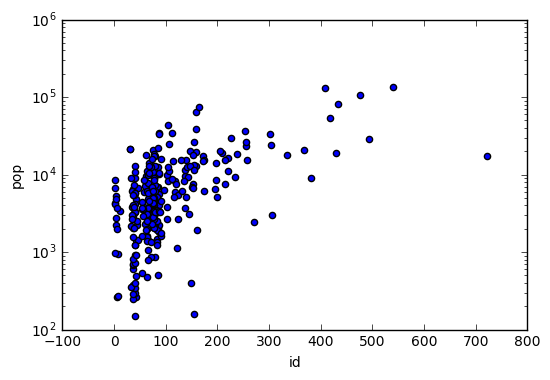

In [203]:
df_okay.plot.scatter(x='id', y='pop', logy=True);